## Analysing time course scRNA-seq of day 6 RACL and day 24 NACL conversion

In [1]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/NACL_RACL")

Libraries

In [2]:
suppressMessages(library(Seurat))
suppressMessages(library(ggplot2))
suppressMessages(library(patchwork))
suppressMessages(library(hdf5r))
set.seed(1234)
library(viridis)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Warning message:
“package ‘hdf5r’ was built under R version 4.1.1”
Loading required package: viridisLite



In [3]:
suppressMessages(library(Matrix))

In [4]:
suppressMessages(library(dplyr))
suppressMessages(library(tidyverse))

Warning message:
“‘timedatectl’ indicates the non-existent timezone name ‘n/a’”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Europe/Brussels’ (or equivalent)”
Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [5]:
library(tibble)

In [6]:
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [7]:
library(wacolors)

## Loading count matrix with gene symbols

In [8]:
mat <- read.csv("scRNA_seq_RACL_NACL_count_matrix.csv",row.names =1)

In [9]:
head(mat)
dim(mat)
class(mat)

,AAACCCACATTCGATG.1,AAACCCAGTGAGAACC.1,AAAGAACTCTAACGGT.1,AAAGGGCCAGCAGATG.1,AAAGTCCAGACGGTTG.1,AAAGTCCAGCTGTTAC.1,AAAGTCCCAGTCAACT.1,AAATGGAAGATAGTCA.1,AACAAAGAGCCTGTCG.1,AACAACCCAAGTCCCG.1,⋯,TGCGGGTCAGCCTTCT.1,TTCACCGGTCCGACGT.1,TTCAGGACACTAGGCC.1,TTCGCTGAGCCTCTCT.1,TTCGGTCCAAGTTCCA.1,TTGAGTGGTGATACTC.1,TTGCTGCCACTAACCA.1,TTGGGTAGTCAATGGG.1,TTGTTCAAGCACTAAA.1,TTTGATCGTCATTCCC.1
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
MIR1302-2HG,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
FAM138A,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OR4F29,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
OR4F16,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC01409,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,1,0,1,0,0,0,1


[1] 24907   668

[1] "data.frame"

In [10]:
anno<- read.csv("bc_list.csv")

In [17]:
anno$cell_name<- gsub("-", "\\.",anno$cell_name )

In [18]:
head(anno)

,X,cell_name,Samples
,<int>,<chr>,<chr>
1,1,AAACCCACACTGTTCC.1,NACL
2,2,AAACCCATCACTAGCA.1,NACL
3,3,AAACGAAAGTTTCTTC.1,NACL
4,4,AAACGAACAAATAAGC.1,NACL
5,5,AAACGCTCAATTCGTG.1,NACL
6,6,AAACGCTTCAAGCTGT.1,NACL


## Create Seurat object 

In [21]:
so <- CreateSeuratObject(
  counts = mat,
  project = "RACL_NACL", 
  min.cells = 0,
  min.features = 0)

In [22]:
so

An object of class Seurat 
24907 features across 668 samples within 1 assay 
Active assay: RNA (24907 features, 0 variable features)

In [14]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACCCACATTCGATG.1,RACL_NACL,15454,4002
AAACCCAGTGAGAACC.1,RACL_NACL,61217,7582
AAAGAACTCTAACGGT.1,RACL_NACL,580,383
AAAGGGCCAGCAGATG.1,RACL_NACL,25544,5529
AAAGTCCAGACGGTTG.1,RACL_NACL,440,337
AAAGTCCAGCTGTTAC.1,RACL_NACL,461,254


In [19]:
all(row.names(so@meta.data)%in%anno$cell_name)

[1] TRUE

In [23]:
so@meta.data$cell_name<- row.names(so@meta.data)

In [24]:
so@meta.data<- left_join(so@meta.data, anno, by = "cell_name")

In [25]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,cell_name,X,Samples
,<fct>,<dbl>,<int>,<chr>,<int>,<chr>
1,RACL_NACL,15454,4002,AAACCCACATTCGATG.1,1693,RACL
2,RACL_NACL,61217,7582,AAACCCAGTGAGAACC.1,1694,RACL
3,RACL_NACL,580,383,AAAGAACTCTAACGGT.1,1710,RACL
4,RACL_NACL,25544,5529,AAAGGGCCAGCAGATG.1,1716,RACL
5,RACL_NACL,440,337,AAAGTCCAGACGGTTG.1,1721,RACL
6,RACL_NACL,461,254,AAAGTCCAGCTGTTAC.1,1722,RACL


In [26]:
row.names(so@meta.data)<- so$cell_name

In [27]:
so@meta.data<- so@meta.data[, -5]

In [28]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,cell_name,Samples
,<fct>,<dbl>,<int>,<chr>,<chr>
AAACCCACATTCGATG.1,RACL_NACL,15454,4002,AAACCCACATTCGATG.1,RACL
AAACCCAGTGAGAACC.1,RACL_NACL,61217,7582,AAACCCAGTGAGAACC.1,RACL
AAAGAACTCTAACGGT.1,RACL_NACL,580,383,AAAGAACTCTAACGGT.1,RACL
AAAGGGCCAGCAGATG.1,RACL_NACL,25544,5529,AAAGGGCCAGCAGATG.1,RACL
AAAGTCCAGACGGTTG.1,RACL_NACL,440,337,AAAGTCCAGACGGTTG.1,RACL
AAAGTCCAGCTGTTAC.1,RACL_NACL,461,254,AAAGTCCAGCTGTTAC.1,RACL


In [29]:
MT.gene <- grep(pattern = "^MT-", x = rownames(mat), value = TRUE) 

In [30]:
head(MT.gene)

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6"

In [31]:
so[["percent.mt"]] <- PercentageFeatureSet(so, pattern = "^MT[-]")

In [32]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,cell_name,Samples,percent.mt
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>
AAACCCACATTCGATG.1,RACL_NACL,15454,4002,AAACCCACATTCGATG.1,RACL,0.4141323
AAACCCAGTGAGAACC.1,RACL_NACL,61217,7582,AAACCCAGTGAGAACC.1,RACL,10.9920447
AAAGAACTCTAACGGT.1,RACL_NACL,580,383,AAAGAACTCTAACGGT.1,RACL,0.3448276
AAAGGGCCAGCAGATG.1,RACL_NACL,25544,5529,AAAGGGCCAGCAGATG.1,RACL,7.1954275
AAAGTCCAGACGGTTG.1,RACL_NACL,440,337,AAAGTCCAGACGGTTG.1,RACL,2.9545455
AAAGTCCAGCTGTTAC.1,RACL_NACL,461,254,AAAGTCCAGCTGTTAC.1,RACL,11.0629067


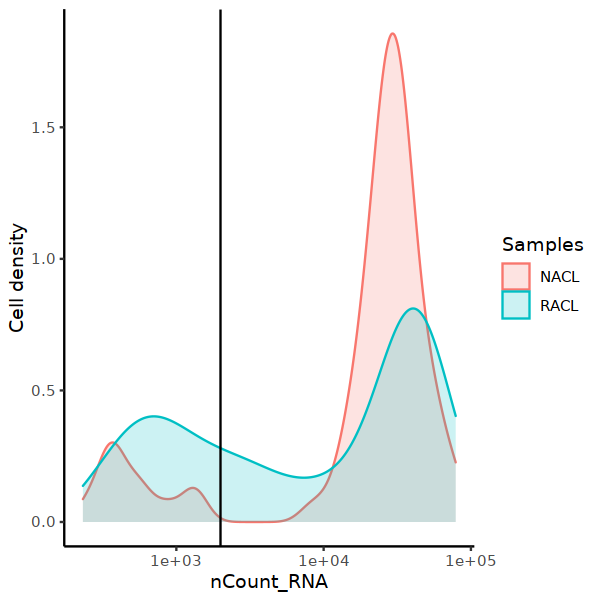

In [33]:
options(repr.plot.width=5, repr.plot.height=5)
so@meta.data %>% 
  	ggplot(aes(color=Samples, x=nCount_RNA, fill= Samples)) + 
  	geom_density(alpha = 0.2) + 
  	scale_x_log10() + 
  	theme_classic() +
  	ylab("Cell density") +
  	geom_vline(xintercept = 2000)

In [35]:
plot1 <- FeatureScatter(so, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")

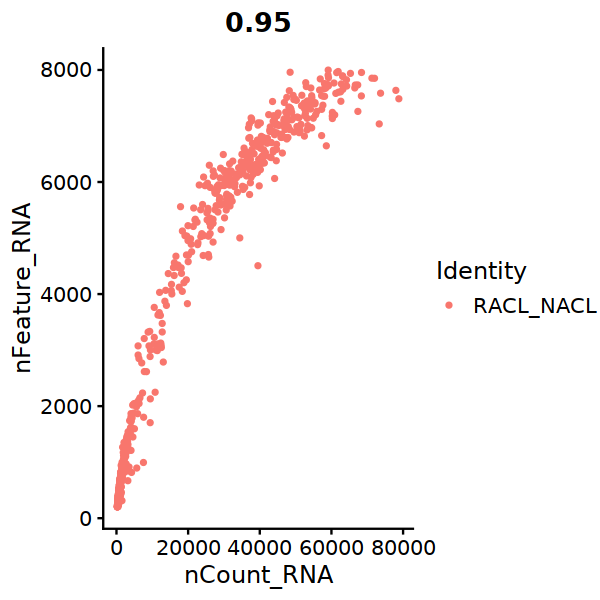

In [36]:
plot1

Filtering of low quailty cells
+ We filter out cells that have unique gene counts over 5000 (this can be adapted to your data) or less than 200 (quite stringent, can be lower) Note that low.thresholds and high.thresholds are used to define a 'gate'. -Inf and Inf should be used if you don't want a lower or upper threshold.
+ We also eliminate cells that have 25 or more percent reads mapped to mitochondrial genes.

In [37]:
so<- subset(so, subset = nFeature_RNA > 200 & nFeature_RNA < 8000& percent.mt<20)

In [38]:
so

An object of class Seurat 
24907 features across 668 samples within 1 assay 
Active assay: RNA (24907 features, 0 variable features)

In [39]:
table(so$Samples)


NACL RACL 
  75  593 

## Normalization

In [40]:
so <- NormalizeData(object = so, normalization.method = "LogNormalize", 
    scale.factor = 10000)

## Identification of highly variable features (feature selection)

In [41]:
so <- FindVariableFeatures(so, selection.method = "vst", nfeatures = 2000) # Chose another nfeature

In [42]:
dim(so@assays$RNA)
so@assays$RNA[1:5,1:5]

[1] 24907   668

5 x 5 sparse Matrix of class "dgCMatrix"
            AAACCCACATTCGATG.1 AAACCCAGTGAGAACC.1 AAAGAACTCTAACGGT.1
MIR1302-2HG                  .                  .                  .
FAM138A                      .                  .                  .
OR4F5                        .                  .                  .
OR4F29                       .                  .                  .
OR4F16                       .                  .                  .
            AAAGGGCCAGCAGATG.1 AAAGTCCAGACGGTTG.1
MIR1302-2HG                  .                  .
FAM138A                      .                  .
OR4F5                        .                  .
OR4F29                       .                  .
OR4F16                       .                  .

In [43]:
top10 <- head(VariableFeatures(so), 10)

In [44]:
print(top10)

 [1] "CER1"   "IGFBP5" "LUM"    "LHX1"   "CGA"    "ACTC1"  "MGP"    "COL1A1"
 [9] "DCN"    "H19"   


Plot variable features with and without labels

In [45]:
plot1 <- VariableFeaturePlot(so)

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 5709 rows containing missing values (geom_point).”


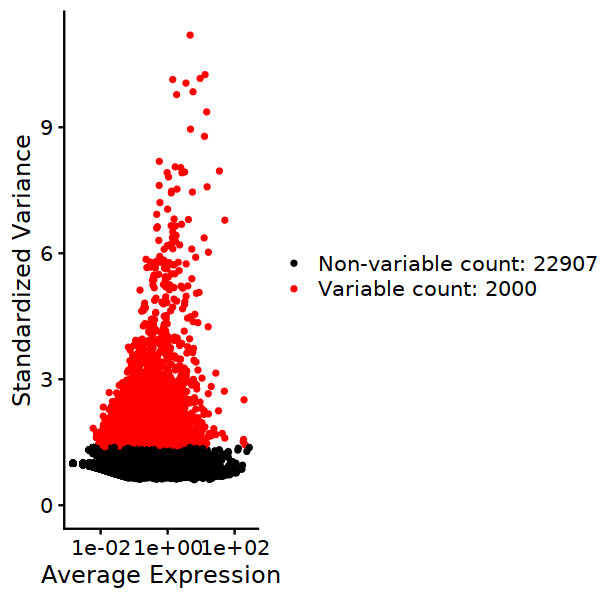

In [46]:
plot1

In [47]:
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)

When using repel, set xnudge and ynudge to 0 for optimal results



Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 5709 rows containing missing values (geom_point).”


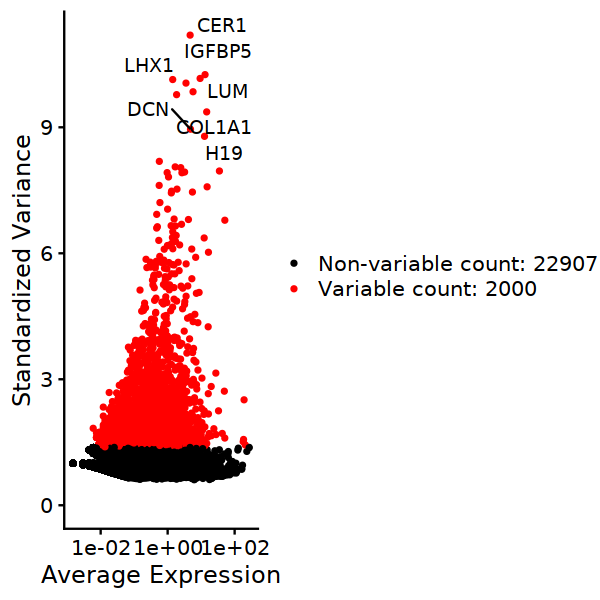

In [48]:
plot2

## Scaling the data

In [49]:
all.genes <- rownames(so)

In [50]:
so <- ScaleData(so, features = all.genes)

Centering and scaling data matrix



In [51]:
dim(so@assays$RNA)

[1] 24907   668

## PCA on the total dataset

In [52]:
so <- RunPCA(so, features = VariableFeatures(object = so),npcs=60,nfeatures.print=10,ndims.print=1:5,seed.use=13)

PC_ 1 
Positive:  COL3A1, COL5A1, COL5A2, TTC3, FBN1, COL1A2, COL6A1, COL6A3, FSTL1, COL15A1 
Negative:  POU5F1, KHDC3L, DPPA5, NLRP7, L1TD1, UTF1, MT1H, DPPA4, KRT18, MT1G 
PC_ 2 
Positive:  CHD7, UACA, SLC7A5, EXT1, JCAD, FLNB, SERPINE2, DHCR24, BAMBI, SQLE 
Negative:  DCN, LUM, COL15A1, OGN, IGFBP5, SPOCK1, SEMA3C, SULF1, TRIL, COL1A1 
PC_ 3 
Positive:  MEG3, MEG8, SEMA6A, CCPG1, L1TD1, JARID2, PCAT14, FZD5, FGF2, CD9 
Negative:  ACTC1, FLT1, SMAD9, RSPO2, TMEM88, LIX1, PRSS23, RGS5, CRB2, PMP22 
PC_ 4 
Positive:  CER1, EOMES, LHX1, NOG, OTX2, LGR5, FZD7, LRIG3, FOXQ1, SLCO2A1 
Negative:  RSPO2, FLT1, ACTC1, VCAN, EGFLAM, SMAD9, NID2, EBPL, TERF1, FJX1 
PC_ 5 
Positive:  FABP5, MSH6, DNMT3B, DLGAP5, TPX2, IGDCC3, CENPF, GTSE1, PHC1, VCAN 
Negative:  SRSF8, GADD45A, RSRP1, CDKN1A, SFN, RRAD, ALPG, SNHG12, GDF15, TAF11L11 



In [53]:
print(so[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  COL3A1, COL5A1, COL5A2, TTC3, FBN1 
Negative:  POU5F1, KHDC3L, DPPA5, NLRP7, L1TD1 
PC_ 2 
Positive:  CHD7, UACA, SLC7A5, EXT1, JCAD 
Negative:  DCN, LUM, COL15A1, OGN, IGFBP5 
PC_ 3 
Positive:  MEG3, MEG8, SEMA6A, CCPG1, L1TD1 
Negative:  ACTC1, FLT1, SMAD9, RSPO2, TMEM88 
PC_ 4 
Positive:  CER1, EOMES, LHX1, NOG, OTX2 
Negative:  RSPO2, FLT1, ACTC1, VCAN, EGFLAM 
PC_ 5 
Positive:  FABP5, MSH6, DNMT3B, DLGAP5, TPX2 
Negative:  SRSF8, GADD45A, RSRP1, CDKN1A, SFN 


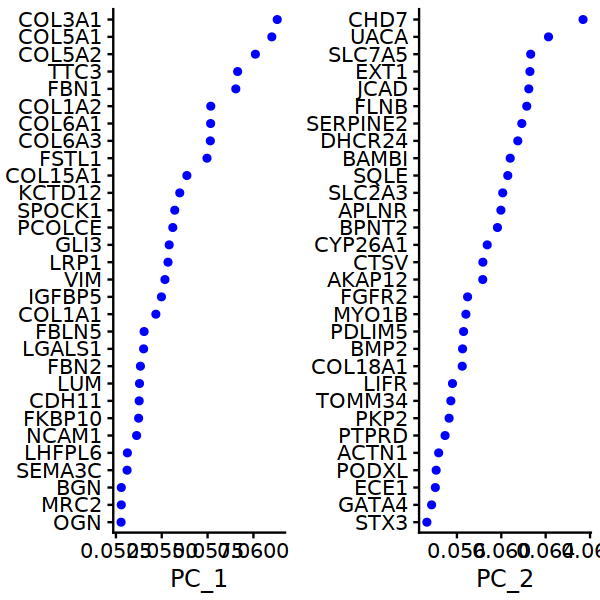

In [54]:
VizDimLoadings(so, dims = 1:2, reduction = "pca")

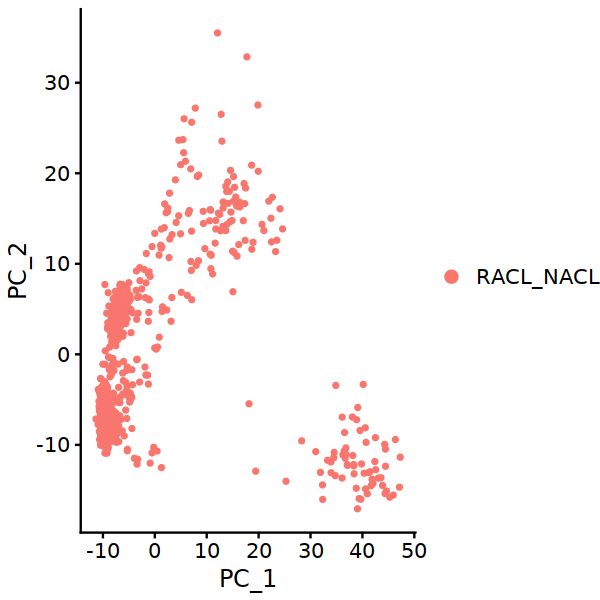

In [55]:
DimPlot(so, reduction = "pca")

Elbow plot

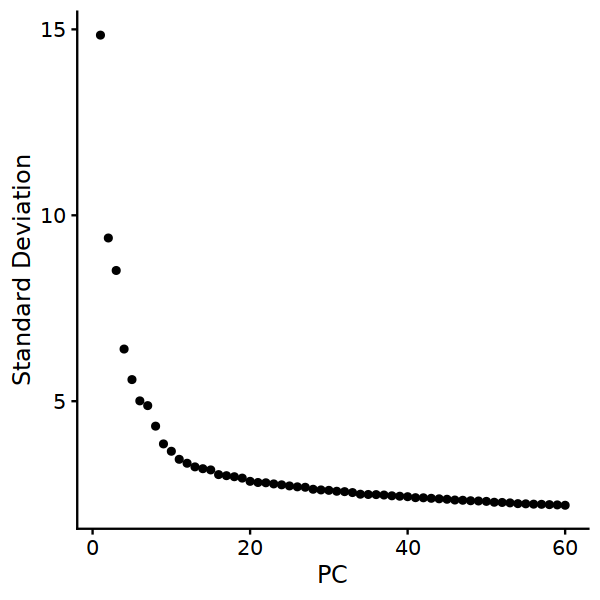

In [56]:
ElbowPlot(
 so,
  ndims = 60)

In [57]:
use.pcs = 1:20

## Cluster the cells

In [58]:
so <- FindNeighbors(so, dims = use.pcs)

Computing nearest neighbor graph

Computing SNN



In [68]:
so <- FindClusters(
    object = so, 
    reduction.type = "pca", 
    dims.use = use.pcs, 
    resolution =0.8, 
    print.output = FALSE, 
    save.SNN = TRUE)

Warning message:
“The following arguments are not used: reduction.type, dims.use, print.output, save.SNN”
Suggested parameter: reduction instead of reduction.type; dims instead of dims.use; verbose instead of print.output


Warning message:
“The following arguments are not used: reduction.type, dims.use, print.output, save.SNN”
Suggested parameter: reduction instead of reduction.type; dims instead of dims.use; verbose instead of print.output




Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 668
Number of edges: 21450

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7868
Number of communities: 8
Elapsed time: 0 seconds


## Run umap

In [69]:
so <- RunUMAP(
  object = so,
  reduction = "pca",
  dims = use.pcs)

15:57:20 UMAP embedding parameters a = 0.9922 b = 1.112

15:57:20 Read 668 rows and found 20 numeric columns

15:57:20 Using Annoy for neighbor search, n_neighbors = 30

15:57:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:57:20 Writing NN index file to temp file /tmp/RtmpxVWKV8/file784e503c40b1

15:57:20 Searching Annoy index using 1 thread, search_k = 3000

15:57:20 Annoy recall = 100%

15:57:20 Commencing smooth kNN distance calibration using 1 thread

15:57:21 Initializing from normalized Laplacian + noise

15:57:21 Commencing optimization for 500 epochs, with 26954 positive edges

15:57:23 Optimization finished



Vizualize umap

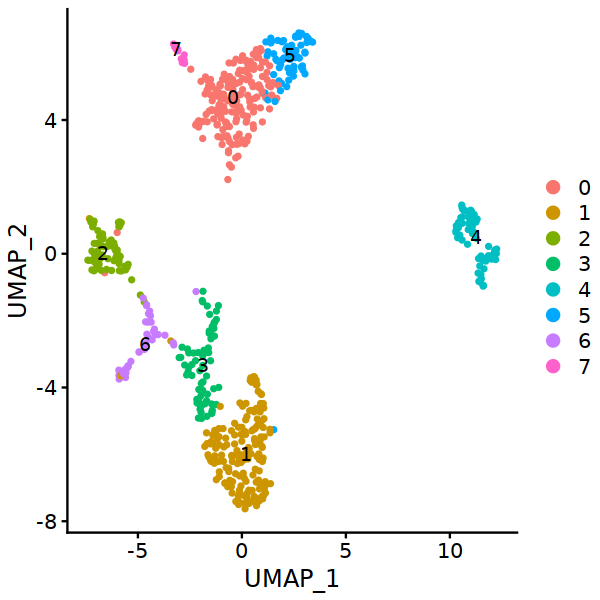

In [70]:
options(repr.plot.width=5, repr.plot.height=5)
DimPlot(so, reduction = "umap", label = T , label.size = 4)

In [39]:
gene_list <-  c( "POU5F1","SOX2", "NANOG", #core
               "OTX2", "ZIC2", "CD24","DUSP6", "TCF4", #primed
                "KLF17", "KLF4", "SUSD2", "DNMT3L","DPPA5", "TFCP2L1",   #naive
               "GATA2","GATA3", "ITGA6", "TP63", "KRT7", "KRT18", "HAND1","NR2F2", "TACSTD2",#trophectoderm
             "LUM", "NID2", "FOXF1", "HAND1", "VIM", "POSTN","ANXA1", "BST2", # EXM
                "SOX17", "GATA4", "GATA6","FOXA2", "PDGFRA", "CDH2",#prE
                "HLA-G", "MMP2", "ITGA5",  #EVT
                "CGA", "CGB3", "SDC1",  #ST 
                "WNT6", "GABRP", "ISL1", "HEY1", "CDH10","CTSV","TPM1", #Amnion  
                "MIXL1", "MESP1", "ZIC3", "TBXT","CDX1", "CDX2", "CDX4","EOMES" #Mesoderm
            )

Warning message in DoHeatmap(so, features = gene_list, size = 5):
“The following features were omitted as they were not found in the scale.data slot for the RNA assay: CK7”
Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



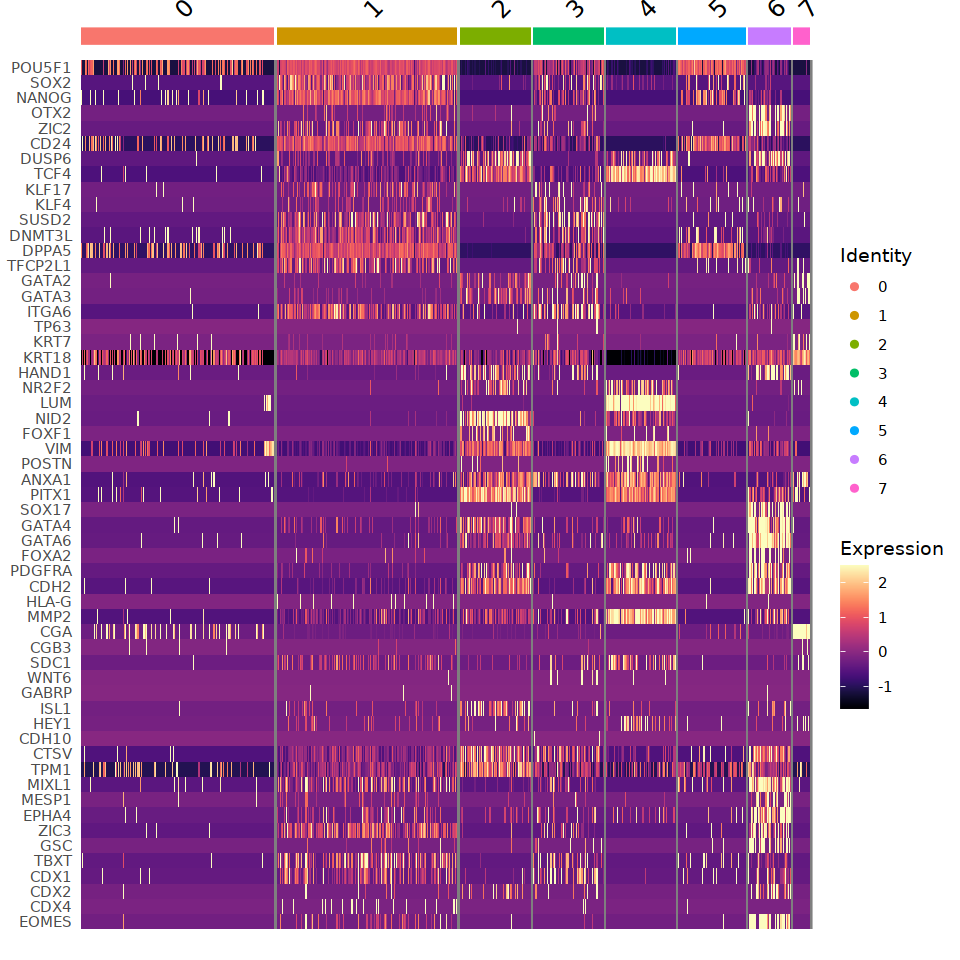

In [131]:
options(repr.plot.width=8, repr.plot.height=8)
heatmap_1<- DoHeatmap(so, features = gene_list
                      , size = 5)+ scale_fill_viridis(option = "A")
heatmap_1

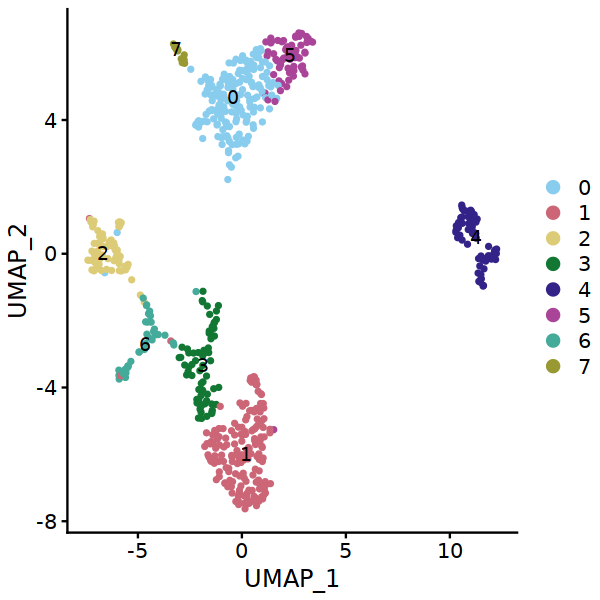

In [78]:
options(repr.plot.width=5, repr.plot.height=5)
DimPlot(so, reduction = "umap", label = T , label.size = 4, cols = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888" ))

In [79]:
so$anno.cluster<- as.character(so$seurat_clusters)

In [80]:
so$anno.cluster[which(so$anno.cluster=="1")]<- "RACL.intermediate.1"
so$anno.cluster[which(so$anno.cluster=="3")]<- "RACL.intermediate.2"
so$anno.cluster[which(so$anno.cluster=="4")]<- "NACL.EXMC"
so$anno.cluster[which(so$anno.cluster=="2")]<- "RACL.EXMC"
so$anno.cluster[which(so$anno.cluster=="6")]<- "RACL.PrE"
so$anno.cluster[which(so$anno.cluster=="0"|so$anno.cluster=="5"|so$anno.cluster=="7")]<- "RACL.intermediate.3"

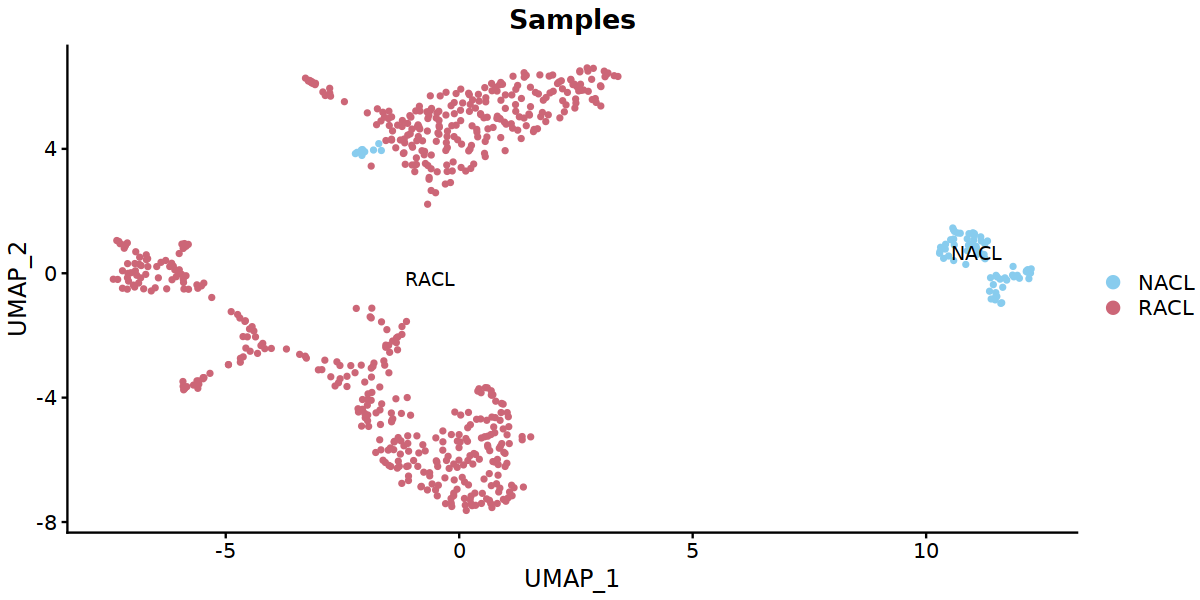

In [86]:
options(repr.plot.width=10, repr.plot.height=5)
p<-DimPlot(so, reduction = "umap", label = T , label.size = 4, cols = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888" ), group.by="Samples")
p

In [87]:
pdf("Figures/FigS6E_UMAP_RACL_NACL_samples.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

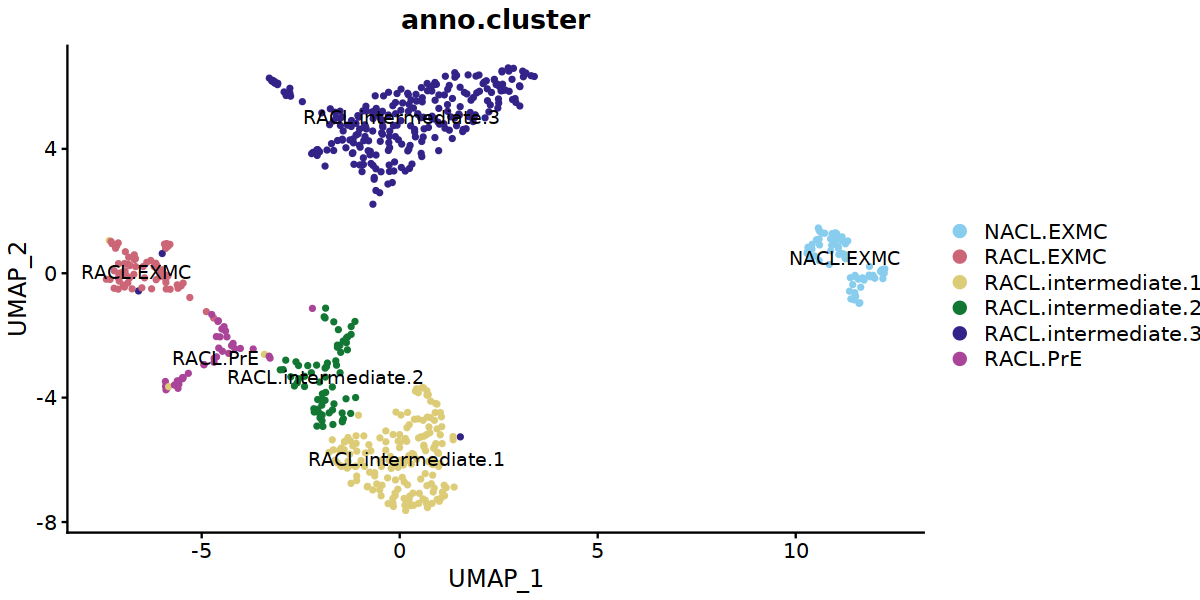

In [88]:
options(repr.plot.width=10, repr.plot.height=5)
p<- DimPlot(so, reduction = "umap", label = T , label.size = 4, cols = c("#88CCEE", "#CC6677", "#DDCC77", "#117733", "#332288", "#AA4499", 
                             "#44AA99", "#999933", "#882255", "#661100", "#6699CC", "#888888" ), group.by="anno.cluster")
p

In [89]:
pdf("Figures/Figs6F_UMAP_RACL_NACL_samples.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



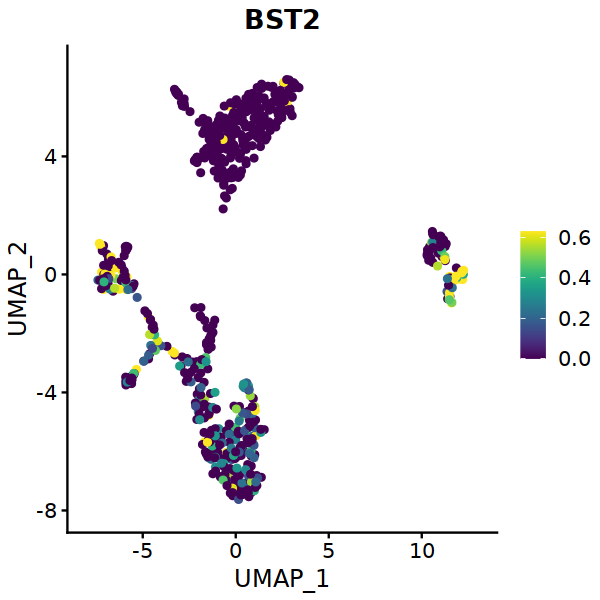

In [90]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "BST2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [91]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_BST2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



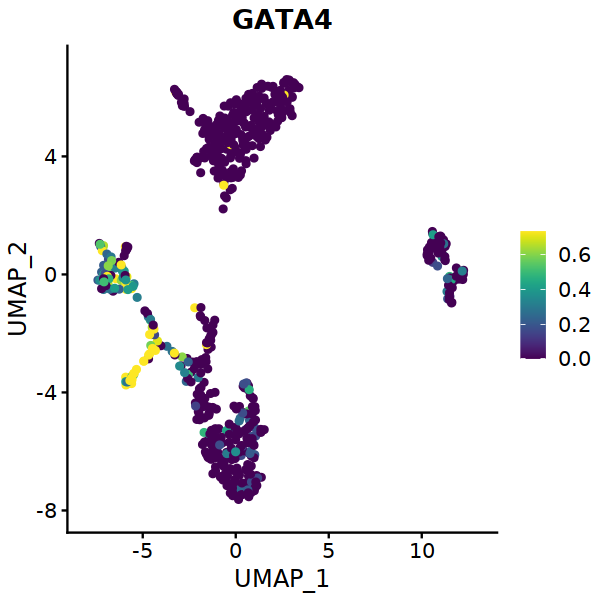

In [92]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "GATA4",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [93]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_GATA4.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



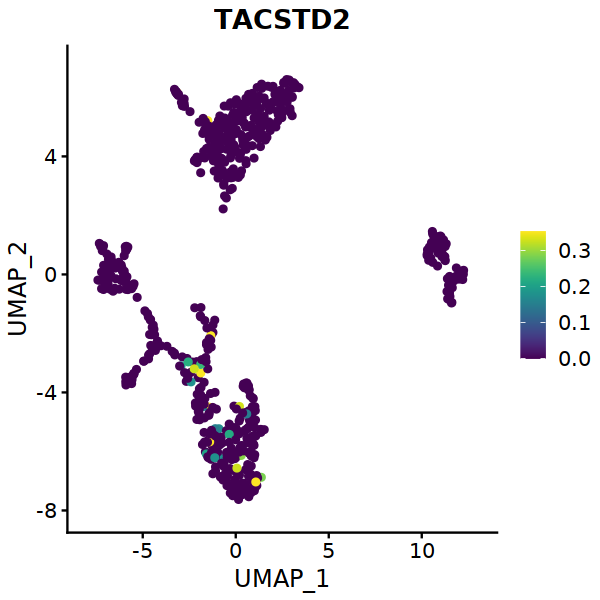

In [94]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "TACSTD2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [95]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_TROP2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



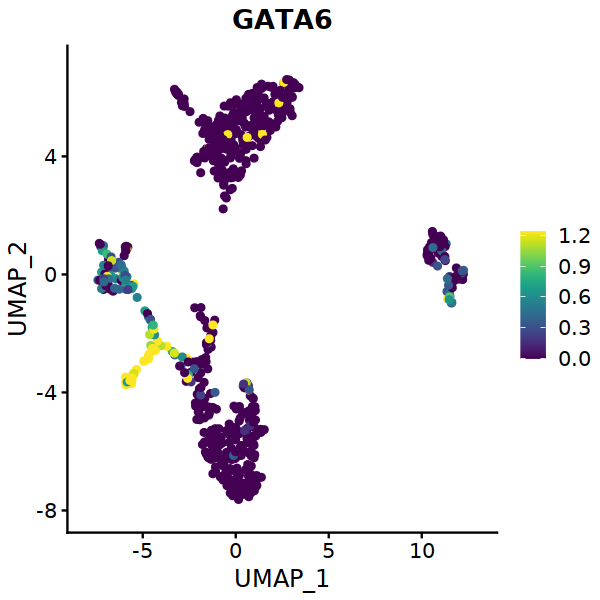

In [96]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "GATA6",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [97]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_GATA6.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



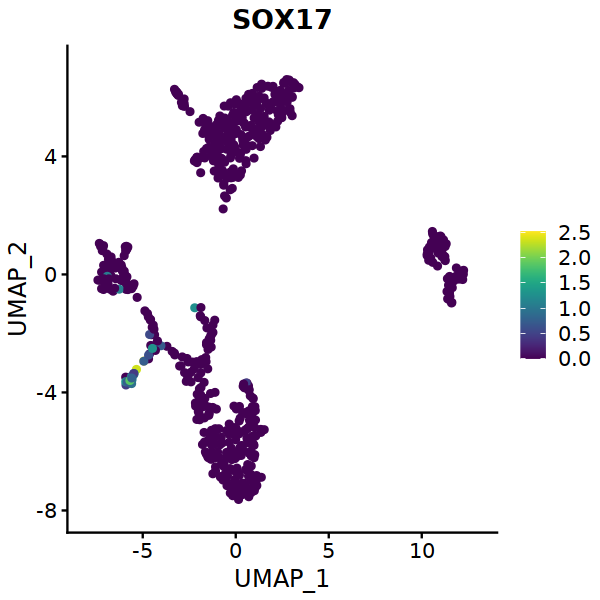

In [98]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "SOX17")+
scale_colour_viridis()
p

In [99]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_SOX17.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



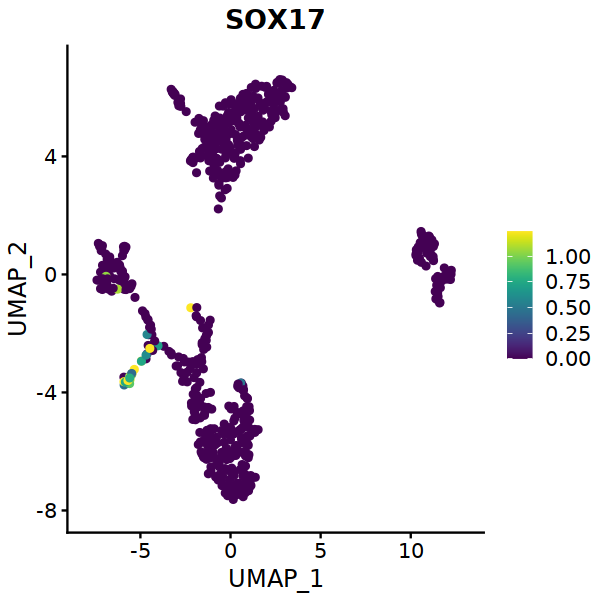

In [100]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "SOX17",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [101]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_SOX17.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



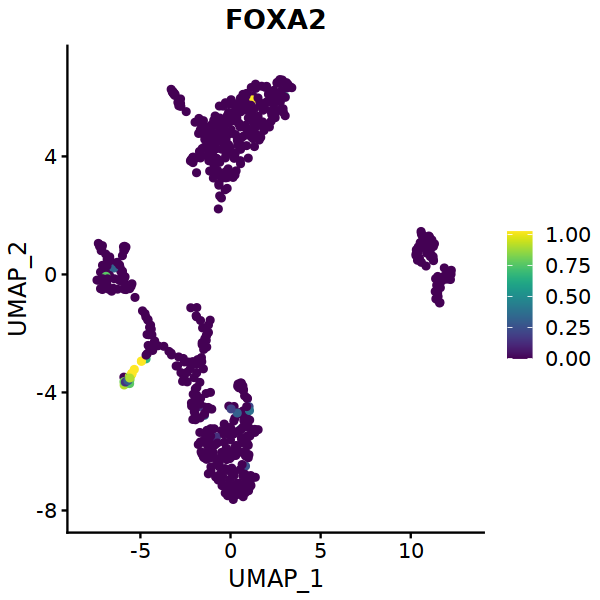

In [102]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "FOXA2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [103]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_FOXA2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



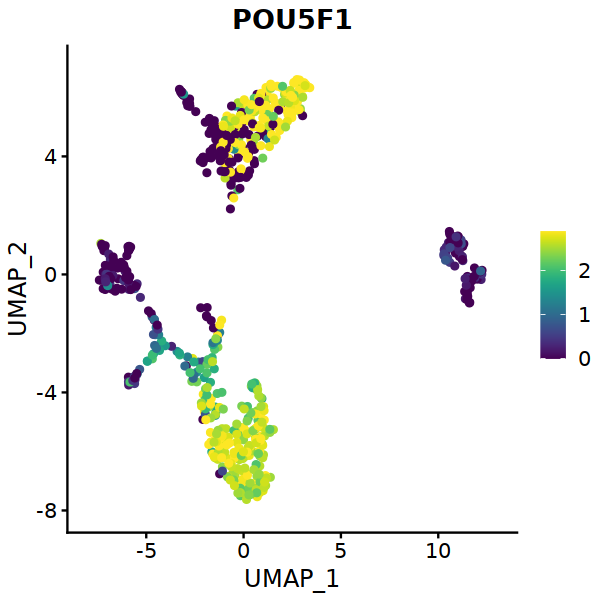

In [104]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "POU5F1",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [105]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_POU5F1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



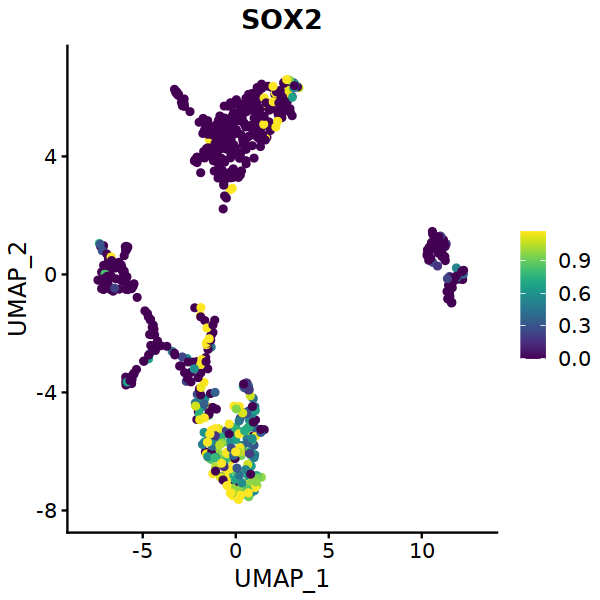

In [106]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "SOX2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [107]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_SOX2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



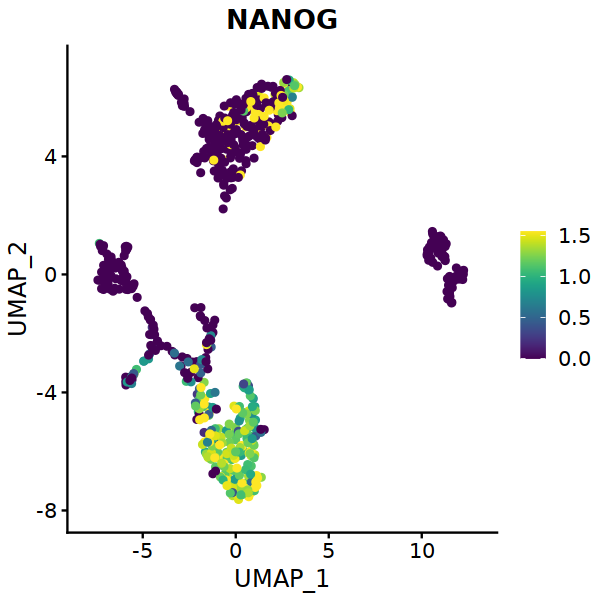

In [108]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "NANOG",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [109]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_NANOG.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



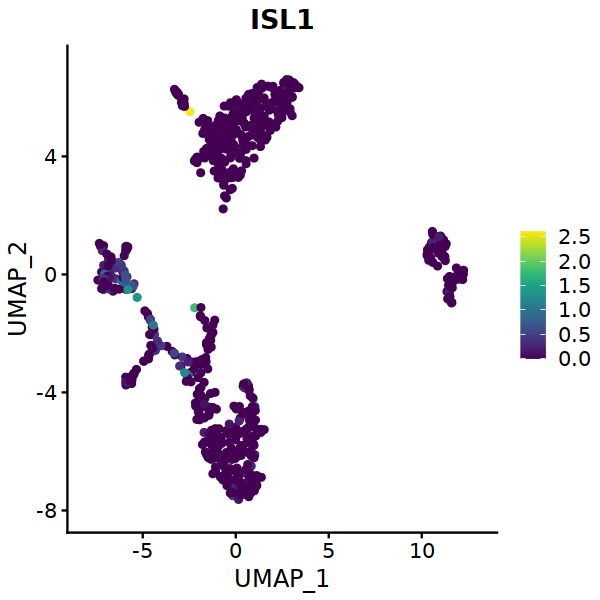

In [110]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ISL1")+
scale_colour_viridis()
p

In [111]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ISL1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



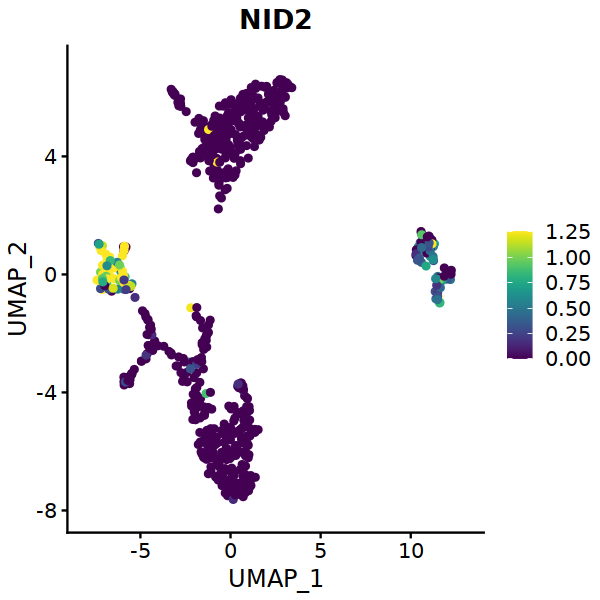

In [112]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "NID2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [113]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_NID2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



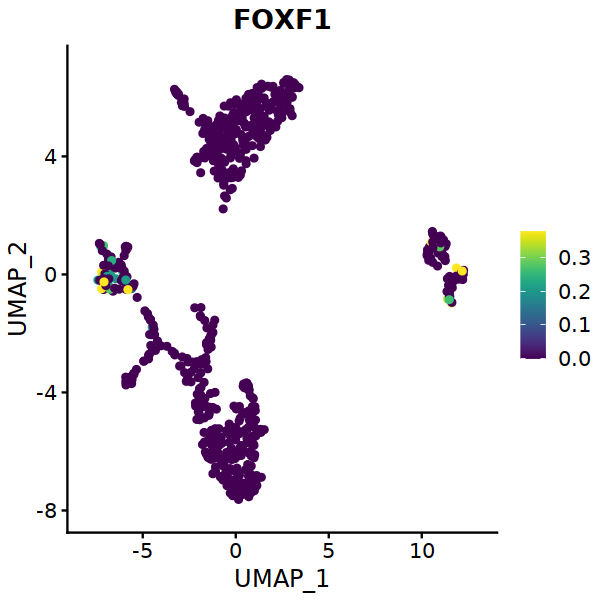

In [114]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "FOXF1",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [115]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_FOXF1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



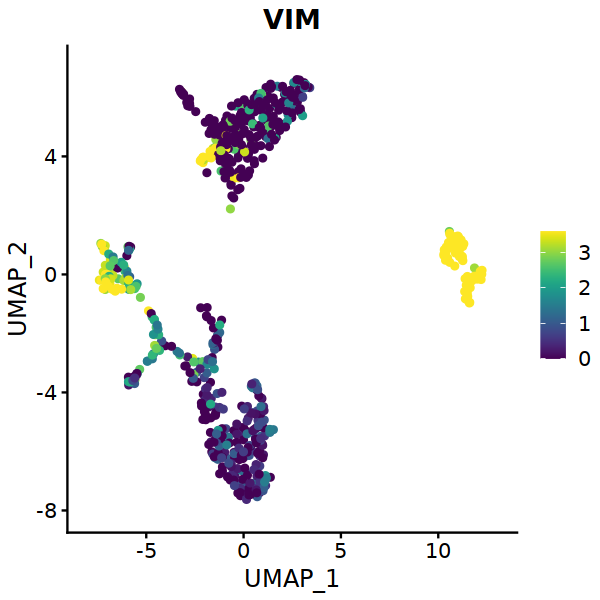

In [116]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "VIM",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [117]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_VIM.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



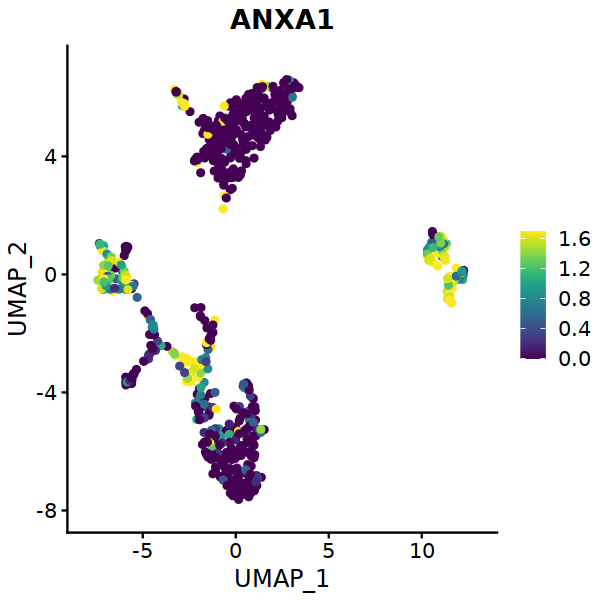

In [118]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ANXA1",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [119]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ANXA1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



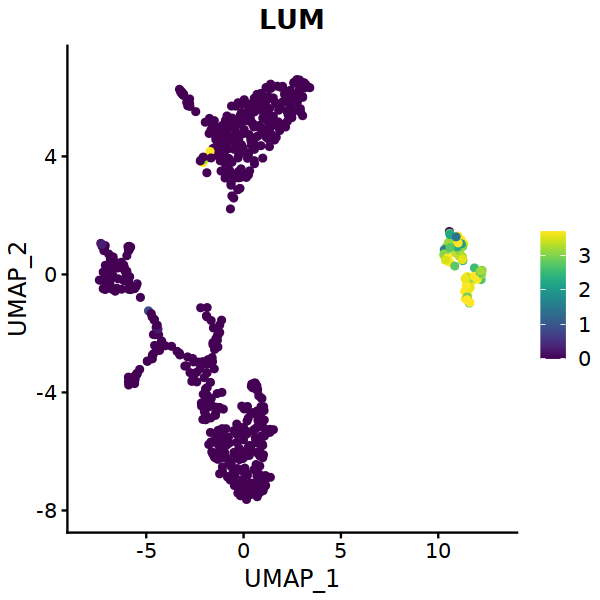

In [120]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "LUM",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [121]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_LUM.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



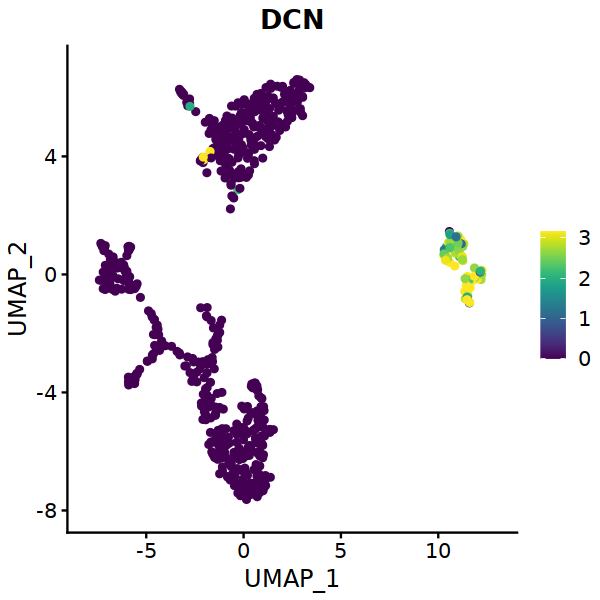

In [122]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "DCN",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [123]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_DCN.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



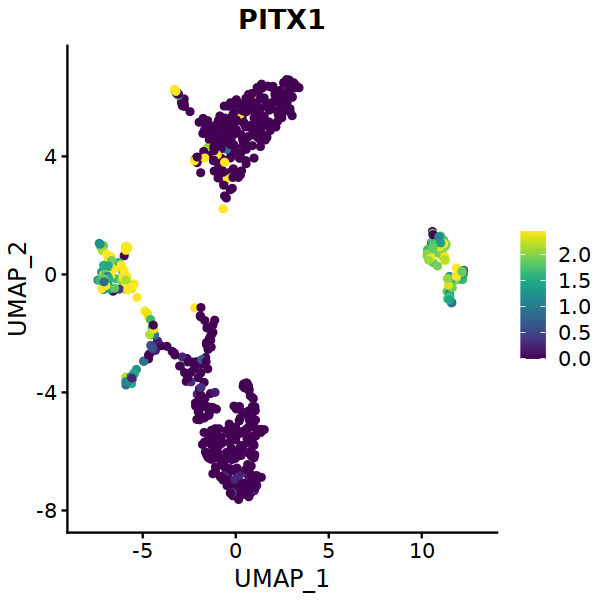

In [124]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "PITX1",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [125]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_PITX1.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



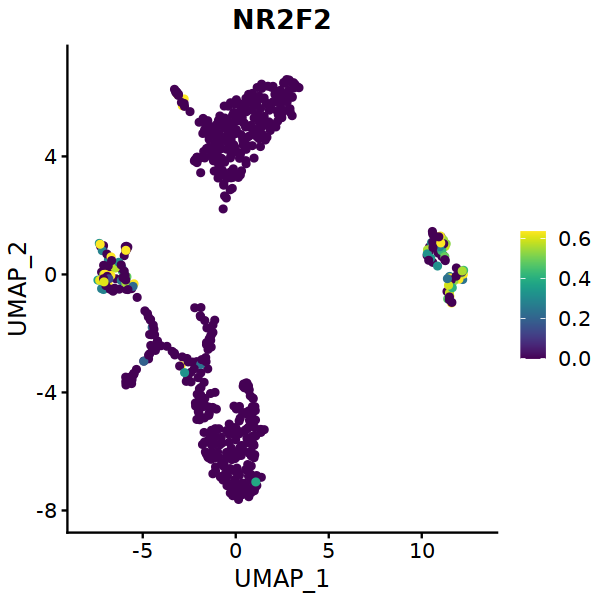

In [126]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "NR2F2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [127]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_NR2F2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



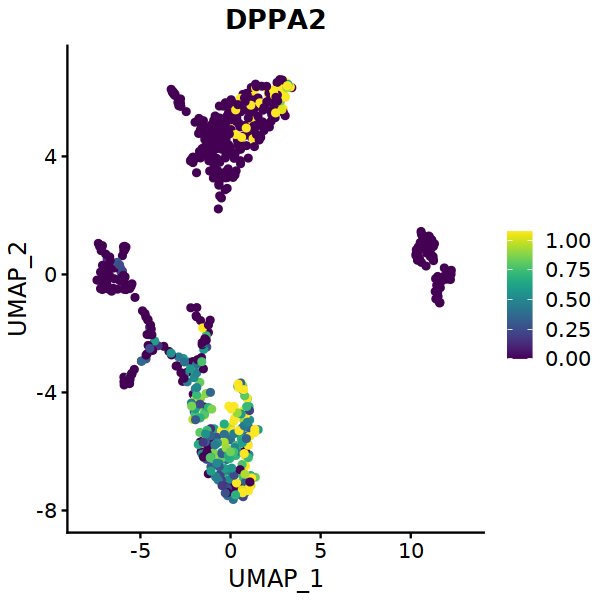

In [43]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "DPPA2",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [44]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_DPPA2.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



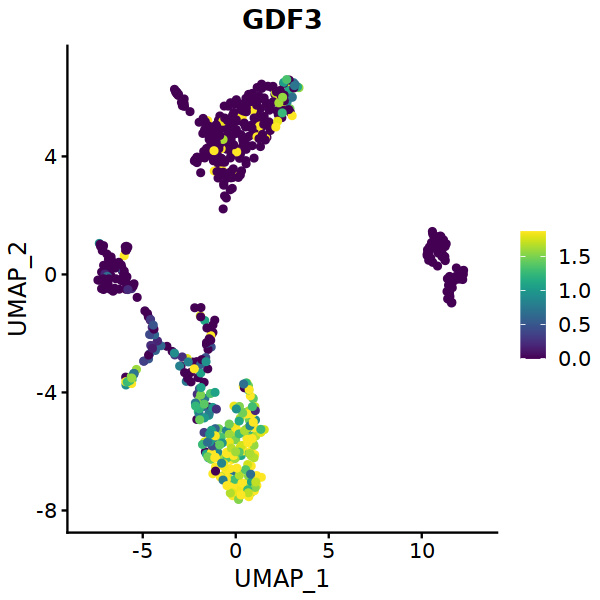

In [45]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "GDF3",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [46]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_GDF3.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



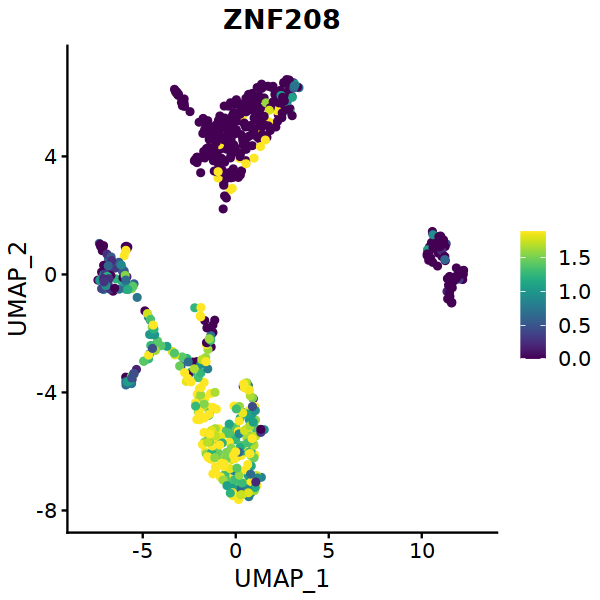

In [47]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ZNF208",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [48]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ZNF208.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



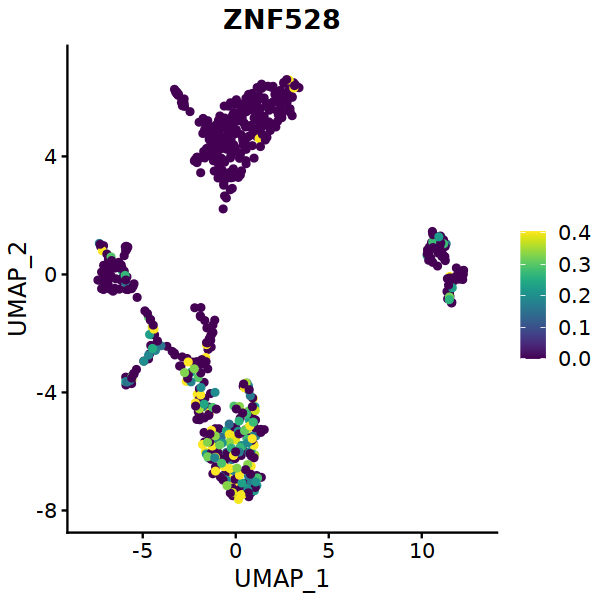

In [50]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ZNF528",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [51]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ZNF528.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



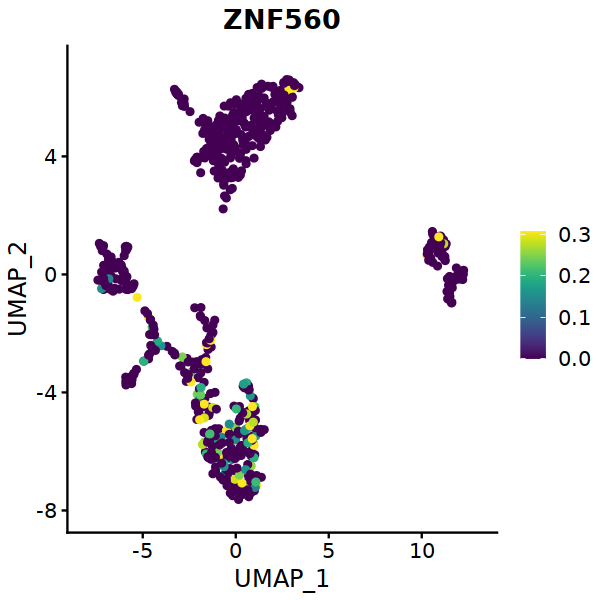

In [52]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ZNF560",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [53]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ZNF560.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



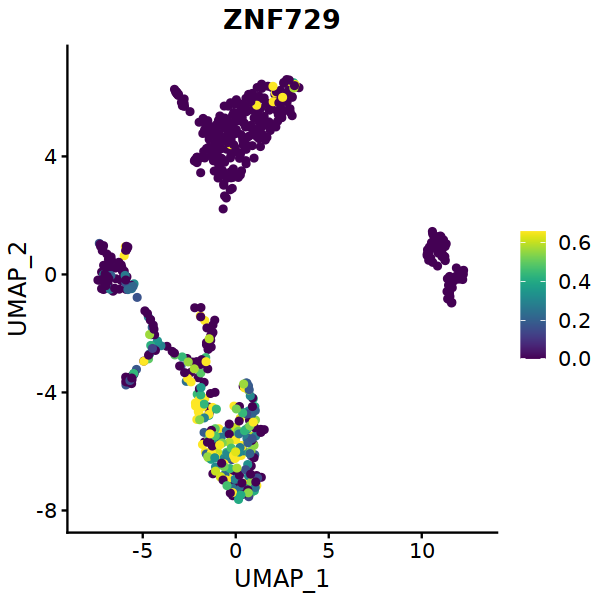

In [55]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ZNF729",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [56]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ZNF729.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



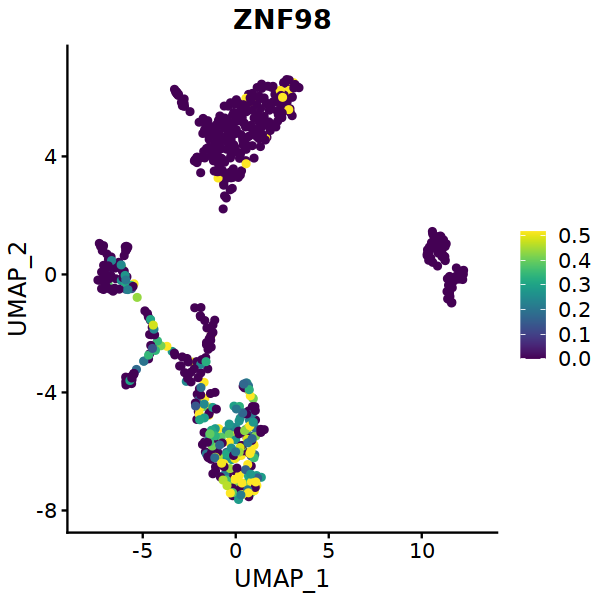

In [57]:
options(repr.plot.width=5, repr.plot.height=5)
p<- FeaturePlot(pt.size = 1.5,
  object = so,
  features = "ZNF98",
  max.cutoff = 'q75')+
scale_colour_viridis()
p

In [58]:
pdf("Figures/FigS6G_UMAP_RACL_NACL_ZNF98.pdf", width = 5, height = 5)
plot(p)
dev.off()

png 
  2

In [128]:
saveRDS(so, "/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/NACL_RACL/so_NACL_RACL_2022.rds")

In [8]:
so<- readRDS("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/NACL_RACL/so_NACL_RACL_2022.rds")

In [17]:
so$anno.cluster<- factor(so$anno.cluster, levels= c("RACL.intermediate.1", "RACL.intermediate.2", "RACL.intermediate.3", "RACL.EXMC", "NACL.EXMC", "RACL.PrE"))

In [9]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,cell_name,Samples,percent.mt,RNA_snn_res.2,seurat_clusters,RNA_snn_res.1.5,RNA_snn_res.0.8,anno.cluster
,<fct>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
AAACCCACATTCGATG.1,RACL_NACL,15454,4002,AAACCCACATTCGATG.1,RACL,0.4141323,3,3,4,3,RACL.intermediate.2
AAACCCAGTGAGAACC.1,RACL_NACL,61217,7582,AAACCCAGTGAGAACC.1,RACL,10.9920447,1,1,0,1,RACL.intermediate.1
AAAGAACTCTAACGGT.1,RACL_NACL,580,383,AAAGAACTCTAACGGT.1,RACL,0.3448276,7,0,1,0,RACL.intermediate.3
AAAGGGCCAGCAGATG.1,RACL_NACL,25544,5529,AAAGGGCCAGCAGATG.1,RACL,7.1954275,1,1,8,1,RACL.intermediate.1
AAAGTCCAGACGGTTG.1,RACL_NACL,440,337,AAAGTCCAGACGGTTG.1,RACL,2.9545455,7,0,1,0,RACL.intermediate.3
AAAGTCCAGCTGTTAC.1,RACL_NACL,461,254,AAAGTCCAGCTGTTAC.1,RACL,11.0629067,0,0,2,0,RACL.intermediate.3


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



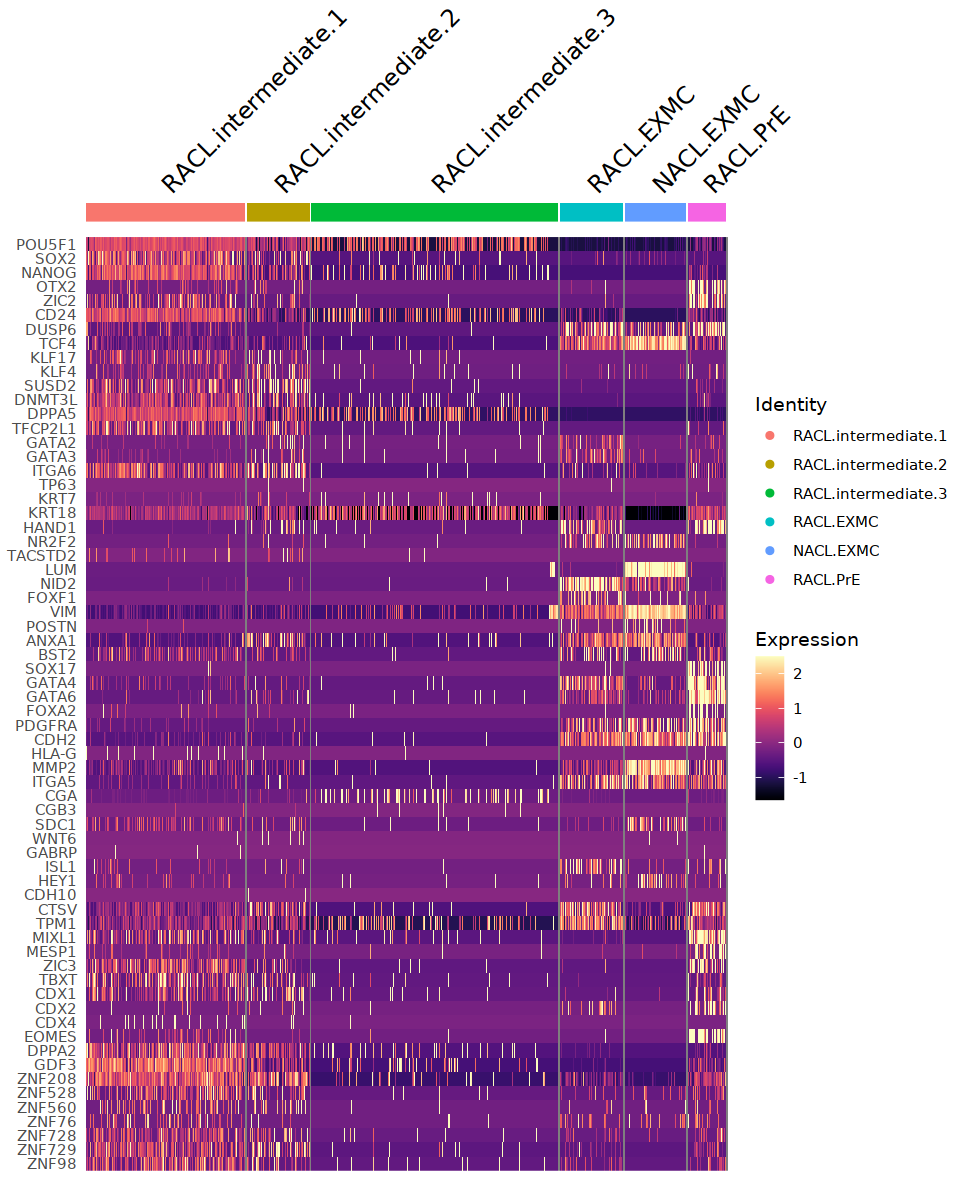

In [40]:
options(repr.plot.width=8, repr.plot.height=10)
heatmap_1<- DoHeatmap(so, features = c(gene_list, "DPPA2", "GDF3", "ZNF208", "ZNF528", "ZNF560", "ZNF76", "ZNF728", "ZNF729", "ZNF98")
                      , size = 5, group.by = "anno.cluster")+ scale_fill_viridis(option = "A")
heatmap_1

In [42]:
pdf("Figures/FigS6_Heatmap_RACL_NACL.pdf", width = 8, height = 10)
plot(heatmap_1)
dev.off()

png 
  2

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



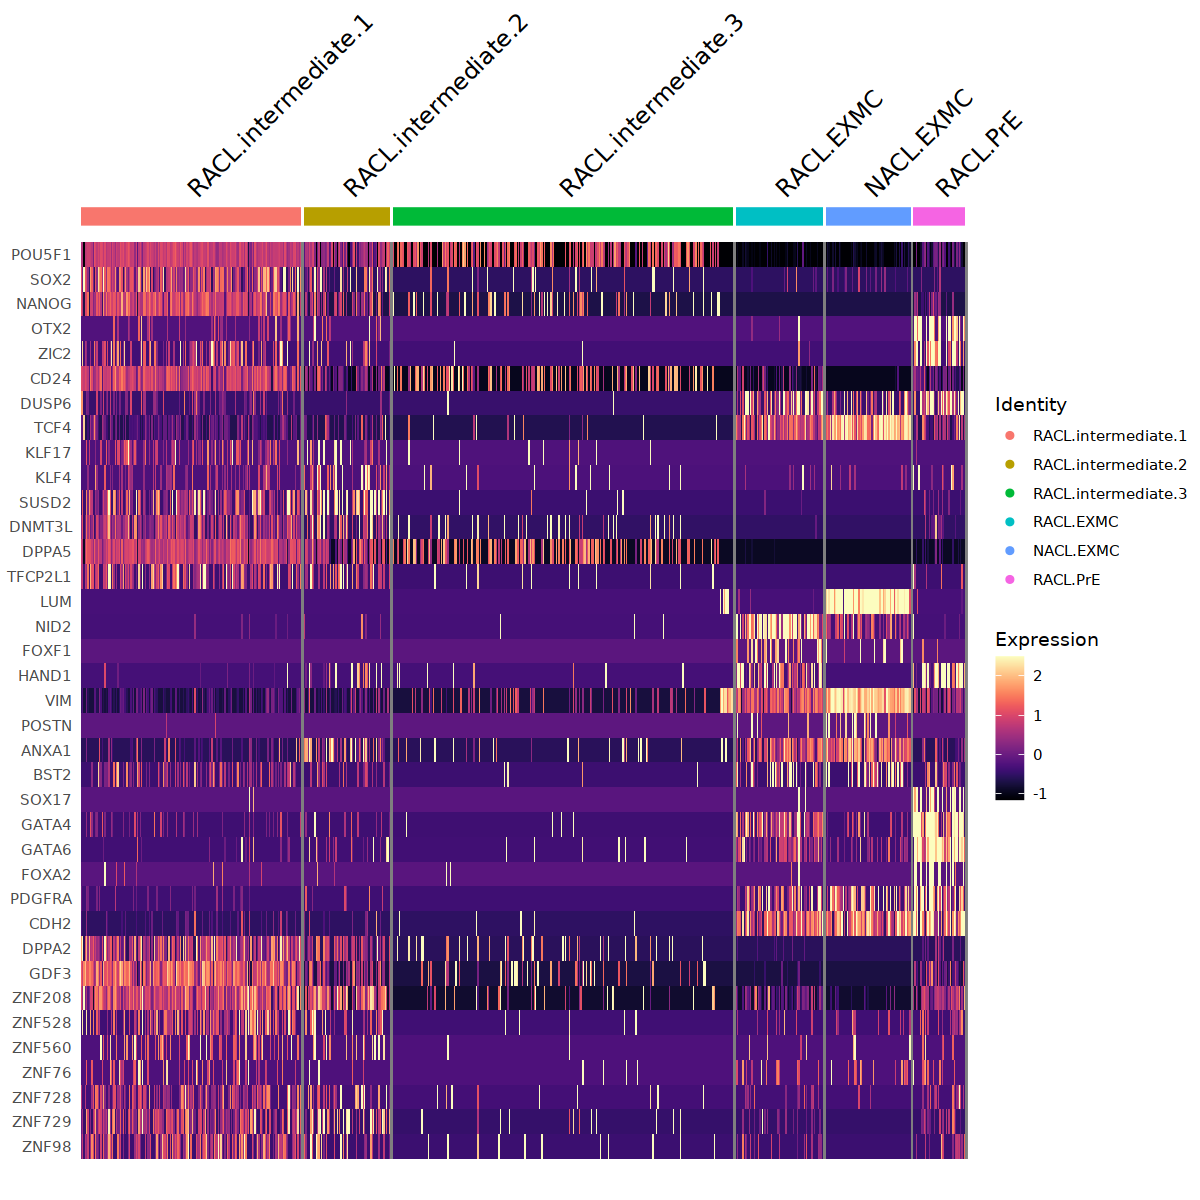

In [34]:
options(repr.plot.width=10, repr.plot.height=10)
heatmap_1<- DoHeatmap(so, features = c( "POU5F1","SOX2", "NANOG", #core
               "OTX2", "ZIC2", "CD24","DUSP6", "TCF4", #primed
                "KLF17", "KLF4", "SUSD2", "DNMT3L","DPPA5", "TFCP2L1",   #naive
              # "GATA2","GATA3", "ITGA6", "TP63", "KRT7", "KRT18", "HAND1","NR2F2",#trophectoderm
             "LUM", "NID2", "FOXF1", "HAND1", "VIM", "POSTN","ANXA1", "BST2", # EXM
                "SOX17", "GATA4", "GATA6","FOXA2", "PDGFRA", "CDH2",#prE
               # "HLA-G", "MMP2",  #EVT
                #"CGA", "CGB3", "SDC1", "CK7", #ST 
               # "WNT6", "GABRP", "ISL1", "HEY1", "HAND1", "CDH10","CTSV","TPM1", #Amnion  
              #  "MIXL1", "MESP1", "EPHA4", "ZIC3", "GSC", "TBXT", "FOXF1", "HAND1", "CDX1", "CDX2", "CDX4","EOMES" #Mesoderm
             "DPPA2", "GDF3", "ZNF208", "ZNF528", "ZNF560", "ZNF76", "ZNF728", "ZNF729", "ZNF98")
                      , size = 5, group.by = "anno.cluster")+ scale_fill_viridis(option = "A")
heatmap_1

In [35]:
pdf("Figures/FigS6_Heatmap_RACL_NACL_short.pdf", width = 10, height = 10)
plot(heatmap_1)
dev.off()

png 
  2